In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)
import os

2.0.1+cu118
0.15.2+cu118


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
classes = train_data.classes

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
print(f"{image.shape}, {classes[label]}")

torch.Size([1, 28, 28]), Ankle boot


(-0.5, 27.5, 27.5, -0.5)

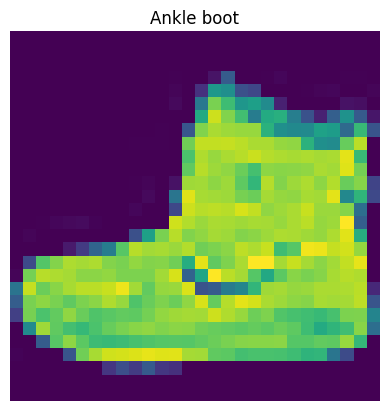

In [8]:
plt.imshow(image.squeeze())
plt.title(classes[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

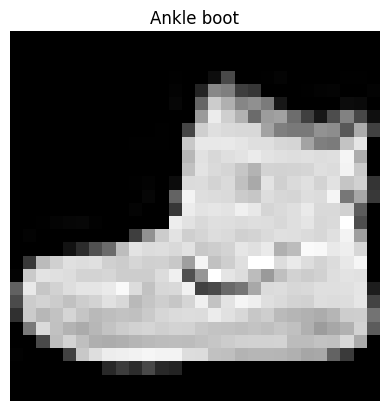

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes[label])
plt.axis(False)

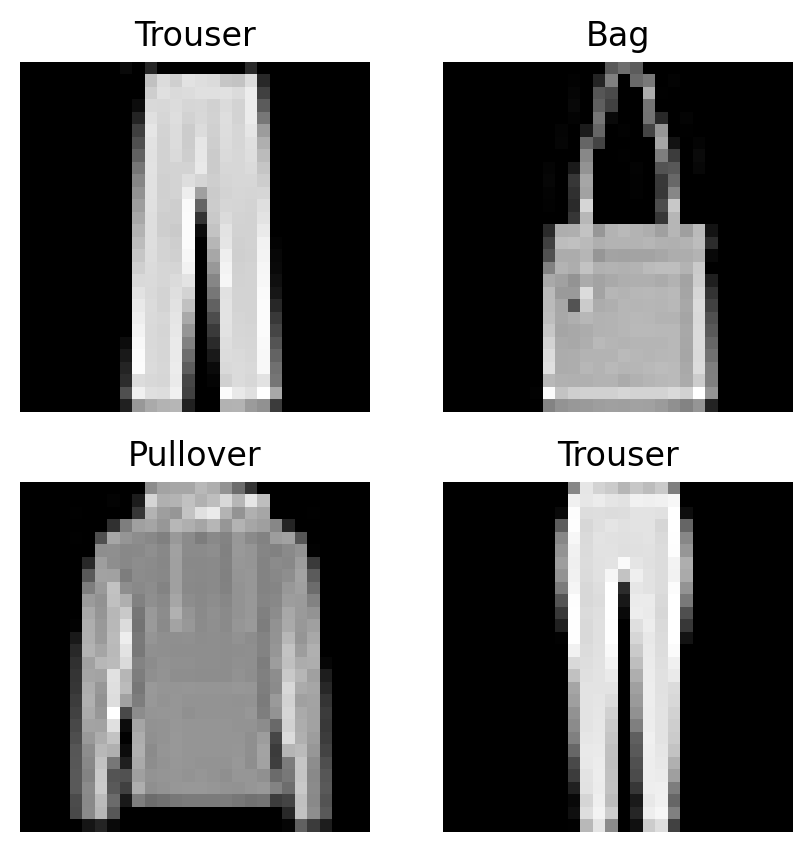

In [10]:
rows, cols = 2, 2
fig = plt.figure(figsize=(5,5), dpi=200)
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), [1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis(False)

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                        batch_size=BATCH_SIZE,
                        shuffle=True)

test_dataloader = DataLoader(test_data,
                       batch_size=BATCH_SIZE,
                       shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x201701ec590>,
 <torch.utils.data.dataloader.DataLoader at 0x2016eef5b10>)

In [12]:
print(len(train_dataloader))
print(len(test_dataloader))

1875
313


In [13]:
60000/32

1875.0

In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

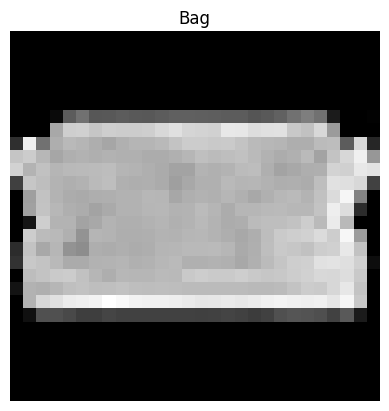

In [15]:
random_idx = torch.randint(0, len(train_features_batch), [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
plt.title(classes[label]);

In [16]:
flatten_layer = nn.Flatten()
x = train_features_batch[0]
flatten_layer(x).shape

torch.Size([1, 784])

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 output_shape: int,
                 hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=output_shape),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [18]:
model_0 = FashionMNISTModelV0(input_shape=28*28,
                              output_shape=len(classes),
                              hidden_units=10).to("cpu")

dummy_x = torch.rand([1, 1, 28, 28])


In [19]:
model_0(dummy_x)

tensor([[ 0.1229, -0.4545,  0.2198,  0.2679, -0.1352,  0.3834, -0.2240,  0.1023,
          0.2737, -0.1591]], grad_fn=<AddmmBackward0>)

In [20]:
model_0(dummy_x).shape

torch.Size([1, 10])

In [21]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("Helper Function already exists! Skipping download...")
else:
    print("Downloading Helper function")
    file = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(file.content)


Helper Function already exists! Skipping download...


In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [24]:
from timeit import default_timer as timer
def print_time(start, end, device):
    run_time = end - start
    print(f"The time taken to run the code is: {run_time:.3f} on the device: {device}")
    return run_time

In [25]:
start = timer()
end = timer()
print(print_time(start, end, "cpu"))

The time taken to run the code is: 0.000 on the device: cpu
1.9999999949504854e-05


In [26]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_start_time_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Training epoch: {epoch}")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        train_preds = model_0(X)
        loss = loss_fn(train_preds, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_preds = model_0(X_test)
            test_loss += loss_fn(test_preds, y_test)
            test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
train_end_time_on_cpu = timer()
train_total_time_model_0 =print_time(train_start_time_on_cpu, train_end_time_on_cpu, str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Training epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.6320 | Test loss: 0.5258 | Test accuracy: 81.2899
Training epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4977 | Test loss: 0.4970 | Test accuracy: 82.4281
Training epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4730 | Test loss: 0.4889 | Test accuracy: 83.1070
The time taken to run the code is: 24.665 on the device: cpu


In [27]:
def evaluate_model(model, data, loss_fn, acc_fn):
    test_loss, test_acc = 0, 0
    model.eval()
    for X, y in tqdm(data):
        test_preds = model(X)
        test_loss += loss_fn(test_preds, y)
        test_acc += acc_fn(y, test_preds.argmax(dim=1))
    test_loss /= len(data)
    test_acc /= len(data)
    return {"model_name": model.__class__.__name__,
            "loss": test_loss.item(),
            "accuracy":test_acc}

In [28]:
model_0_results = evaluate_model(model=model_0, data=test_dataloader, loss_fn=loss_fn, acc_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [29]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'loss': 0.48889827728271484,
 'accuracy': 83.1070287539936}

In [30]:
!nvidia-smi

Sun Jul  9 11:01:50 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8               1W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
torch.cuda.is_available()

True

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [33]:
device

'cuda'

In [34]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.linear_stack = nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=input_shape,
                                                    out_features=hidden_units),
                                        nn.ReLU(),
                                        nn.Linear(in_features=hidden_units,
                                                  out_features=output_shape),
                                        nn.ReLU())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_stack(x)

In [35]:
model_1 = FashionMNISTModelV1(input_shape= 28*28,
                              hidden_units=10,
                              output_shape=len(classes)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [37]:
def train_step(model,
               dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device=device):

    train_loss, train_accuracy = 0, 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        train_preds = model(X)
        loss = loss_fn(train_preds, y)
        train_loss += loss
        train_accuracy += accuracy_fn(y, train_preds.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(dataloader.dataset)} samples.")
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    print(f"Training loss: {train_loss:.5f} | Training accuracy: {train_accuracy:.2f}%")

In [38]:
def test_step(model,
              dataloader,
              loss_fn,
              accuracy_fn,
              device=device):
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(y, test_preds.argmax(dim=1))
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    print(f"Testing Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

In [39]:
torch.manual_seed(101)
epochs = 3
train_start_time_on_gpu = timer()
for epoch in tqdm(range(epochs)):
    print(f"Training epoch: {epoch}\n-------------")
    train_step(model=model_1,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_end_time_on_gpu = timer()
train_total_time_model_1 = print_time(start=train_start_time_on_gpu, end=train_end_time_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Training epoch: 0
-------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 1.08423 | Training accuracy: 62.75%
Testing Loss: 0.95146 | Test Accuracy: 66.78%
Training epoch: 1
-------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 0.92113 | Training accuracy: 67.36%
Testing Loss: 0.91459 | Test Accuracy: 67.31%
Training epoch: 2
-------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 0.89716 | Training accuracy: 67.88%
Testing Loss: 0.93050 | Test Accuracy: 66.88%
The time taken to run the code is: 38.038 on the device: cuda


In [40]:
def evaluate_model(model, data, loss_fn, acc_fn, device=device):
    test_loss, test_acc = 0, 0
    model.eval()
    for X, y in tqdm(data):
        X, y = X.to(device), y.to(device)
        test_preds = model(X)
        test_loss += loss_fn(test_preds, y)
        test_acc += acc_fn(y, test_preds.argmax(dim=1))
    test_loss /= len(data)
    test_acc /= len(data)
    return {"model_name": model.__class__.__name__,
            "loss": test_loss.item(),
            "accuracy":test_acc}

In [41]:
model_1_results = evaluate_model(model=model_1, 
                                 data=test_dataloader, 
                                 loss_fn=loss_fn, 
                                 acc_fn=accuracy_fn, 
                                 device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'loss': 0.9304952621459961,
 'accuracy': 66.88298722044729}

In [42]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'loss': 0.48889827728271484,
 'accuracy': 83.1070287539936}

In [43]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, 
                 input_shape,
                 output_shape,
                 hidden_units):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
                                            nn.Conv2d(in_channels=input_shape,
                                                        out_channels=hidden_units,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=1),
                                            nn.ReLU(),
                                            nn.Conv2d(in_channels=hidden_units,
                                                        out_channels=hidden_units,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(kernel_size=2))
        self.conv_block_2 = nn.Sequential(
                                            nn.Conv2d(in_channels=hidden_units,
                                                        out_channels=hidden_units,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=1),
                                            nn.ReLU(),
                                            nn.Conv2d(in_channels=hidden_units,
                                                        out_channels=hidden_units,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(kernel_size=2))
        self.classification_layer = nn.Sequential(
                                            nn.Flatten(),
                                            nn.Linear(in_features=hidden_units * 7 * 7,
                                                        out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classification_layer(x)
        return x

In [44]:
model_2 = FashionMNISTModelV2(input_shape=1,
                                output_shape=len(classes),
                                hidden_units=10).to(device)

In [45]:
image.shape

torch.Size([1, 28, 28])

In [46]:
samp_tensor = torch.randn((1, 1, 28, 28))
model_2(samp_tensor.to(device))

tensor([[ 0.0087,  0.0702, -0.0351,  0.0252, -0.0018,  0.0222,  0.0115,  0.0243,
          0.0574, -0.0024]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [47]:
image.shape

torch.Size([1, 28, 28])

In [48]:
torch.manual_seed(101)
sample_images = torch.randn((32, 3, 64, 64))
print(sample_images[0].shape)

torch.Size([3, 64, 64])


In [49]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=1)
img_after_cnv = conv2d(sample_images[0])
img_after_cnv.shape

torch.Size([10, 64, 64])

In [50]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

print(sample_images[0].shape)

print(max_pool_layer(sample_images[0]).shape)

torch.Size([3, 64, 64])
torch.Size([3, 32, 32])


In [51]:
dummy_tensor = torch.randn((1, 1, 2, 2))
print(dummy_tensor)
print(max_pool_layer(dummy_tensor))

tensor([[[[-0.2941,  1.3954],
          [ 1.8332,  0.8021]]]])
tensor([[[[1.8332]]]])


In [52]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [53]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)
epochs = 3
train_start_time_model_2 = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)
train_end_time_model_2 = timer()
train_total_time_model_2 = print_time(train_start_time_model_2, train_end_time_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 0.63262 | Training accuracy: 76.89%
Testing Loss: 0.40360 | Test Accuracy: 85.42%
Epoch: 1
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 0.35727 | Training accuracy: 87.13%
Testing Loss: 0.37059 | Test Accuracy: 86.48%
Epoch: 2
--------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Training loss: 0.32128 | Training accuracy: 88.41%
Testing Loss: 0.36517 | Test Accuracy: 86.26%
The time taken to run the code is: 39.907 on the device: cuda


In [54]:
model_2_results = evaluate_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [55]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.36516574025154114,
 'accuracy': 86.26198083067092}

In [56]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'loss': 0.48889827728271484,
 'accuracy': 83.1070287539936}

In [57]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'loss': 0.9304952621459961,
 'accuracy': 66.88298722044729}

In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

model_name      loss   accuracy
0  FashionMNISTModelV0  0.488898  83.107029
1  FashionMNISTModelV1  0.930495  66.882987
2  FashionMNISTModelV2  0.365166  86.261981

In [59]:
compare_results["time"] = [train_total_time_model_0,
                           train_total_time_model_1,
                           train_total_time_model_2]

In [60]:
compare_results

model_name      loss   accuracy       time
0  FashionMNISTModelV0  0.488898  83.107029  24.664654
1  FashionMNISTModelV1  0.930495  66.882987  38.037813
2  FashionMNISTModelV2  0.365166  86.261981  39.907272

<Axes: ylabel='model_name'>

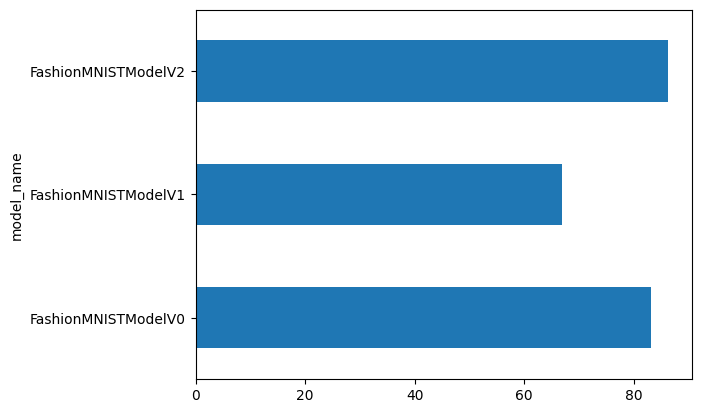

In [61]:
compare_results.set_index("model_name")["accuracy"].plot(kind="barh")

In [62]:
def make_predictions(model, data, device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [63]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(test_samples[0].shape)

torch.Size([1, 28, 28])


In [64]:
pred_probs = make_predictions(model_2, data=test_samples)

In [65]:
pred_probs[:2]

tensor([[9.0757e-01, 4.0538e-04, 1.2550e-02, 7.9704e-03, 1.5606e-04, 1.8088e-04,
         7.0563e-02, 1.3716e-05, 5.7436e-04, 1.3712e-05],
        [1.1515e-03, 3.0425e-04, 3.0833e-04, 2.8029e-05, 5.4531e-03, 7.2351e-06,
         1.6067e-03, 1.0965e-03, 9.7056e-01, 1.9484e-02]])

In [66]:
pred_classes = pred_probs.argmax(dim=1)

In [67]:
pred_classes

tensor([0, 8, 5, 9, 0, 8, 7, 9, 4])

In [68]:
test_labels

[0, 8, 5, 9, 0, 8, 7, 9, 6]

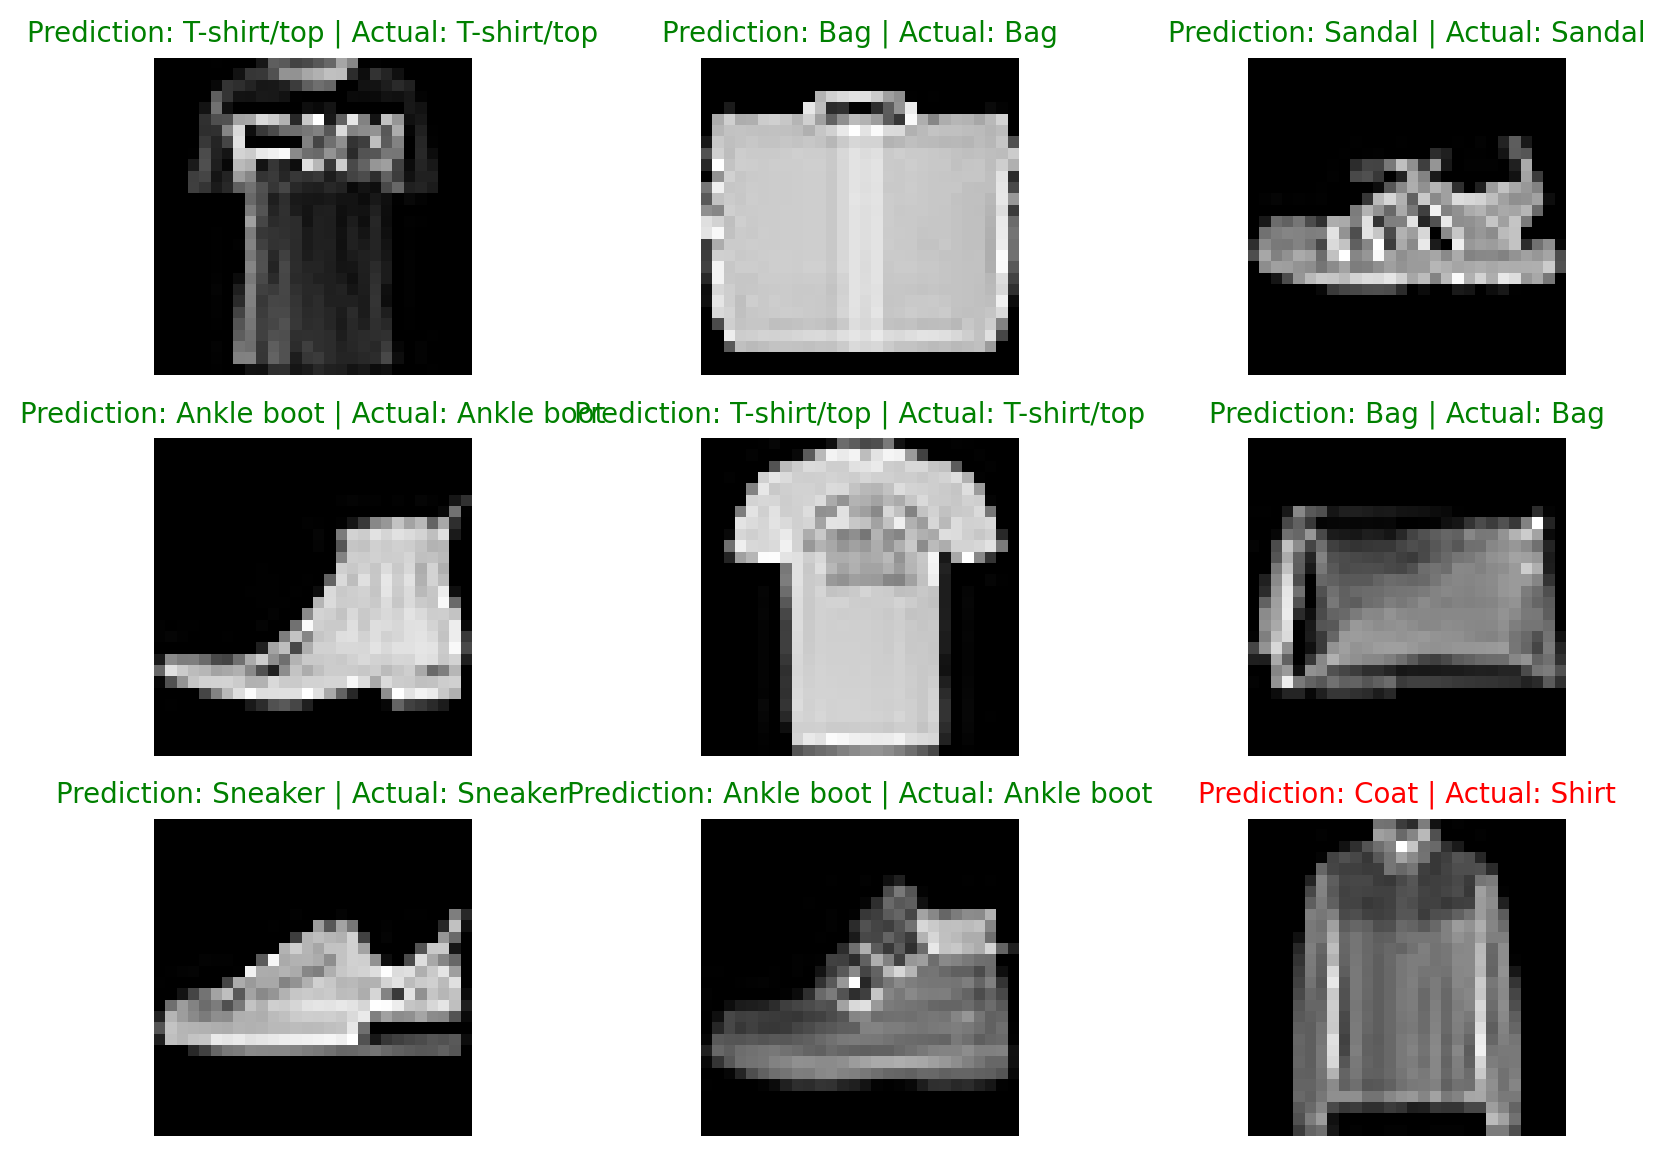

In [69]:
import matplotlib.pyplot as plt
nrows = 3
ncols = 3
plt.figure(figsize=(10, 7), dpi=200)
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    class_label = classes[test_labels[i]]
    preds = classes[pred_classes[i]]
    title_text = f"Prediction: {preds} | Actual: {class_label}"
    if class_label == preds:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, color="r")
    plt.axis(False)


In [70]:
list(test_data)

[(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [71]:
y_preds = []
for X, y in tqdm(test_dataloader, desc="Making Predictions"):
    X, y = X.to(device), y.to(device)
    with torch.inference_mode():
        y_pred_logit = model_2(X)
        y_pred = torch.softmax(y_pred_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.to("cpu"))
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [72]:
len(y_pred_tensor)

10000

In [73]:
import torchmetrics
import mlxtend

In [74]:
print(mlxtend.__version__)

0.22.0


In [75]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(classes))
cm = confmat(y_pred_tensor, test_data.targets)

In [76]:
cm

tensor([[749,   5,  15,  67,  10,   0, 144,   0,  10,   0],
        [ 18, 878,   1,  69,  24,   2,   4,   0,   4,   0],
        [ 34,   3, 676,  25,  98,   1, 152,   0,  10,   1],
        [ 42,  11,  20, 855,  26,   0,  37,   0,   5,   4],
        [  9,   9,  91,  61, 679,   0, 142,   0,   9,   0],
        [ 10,   3,   0,  14,   2, 842,   3,  41,  71,  14],
        [126,   6,  72,  64,  69,   0, 647,   0,  16,   0],
        [  4,   4,   0,   6,   0,  40,   0, 846,  21,  79],
        [ 30,   3,   2,  11,   7,   5,  13,   7, 918,   4],
        [  3,   1,   0,   2,   0,  23,   5,  62,  15, 889]])

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

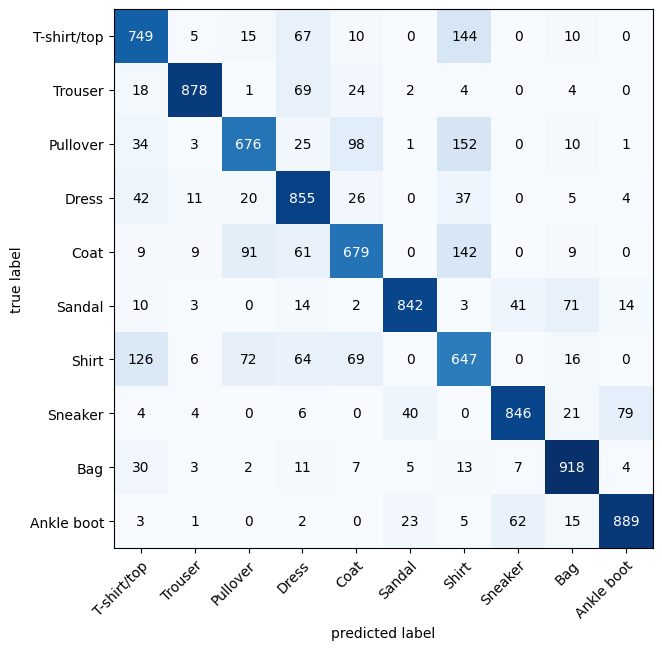

In [78]:
plot_confusion_matrix(cm.numpy(), class_names=classes, figsize=(10, 7))

In [79]:
from pathlib import Path

MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "03_Pytorch_Computer_Vision_model_2.pth"
F_PATH = MODEL_DIR / MODEL_NAME
torch.save(obj=model_2.state_dict(),
           f=F_PATH)

In [80]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     output_shape=len(classes),
                                     hidden_units=10)
loaded_model_2.load_state_dict(torch.load(f=F_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [81]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.36516574025154114,
 'accuracy': 86.26198083067092}

In [82]:
loaded_model_2_results = evaluate_model(loaded_model_2, test_dataloader, loss_fn=loss_fn, acc_fn=accuracy_fn, device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [83]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'loss': 0.36516574025154114,
 'accuracy': 86.26198083067092}

In [86]:
torch.isclose(torch.tensor(model_2_results["accuracy"]), 
              torch.tensor(loaded_model_2_results["accuracy"]))

tensor(True)